### Portfolio Optimisation Using Python (Using the Efficient Frontier)

In [1]:
#Importing libraries
import pandas as pd
from pandas_datareader import data as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#Getting the tickers
assets = ['FB','AMZN','AAPL','NFLX','GOOG']

In [3]:
#Assigning weights to the stocks
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [4]:
#Setting the starting and ending dates
startdate = '2013-01-01'
enddate = datetime.today().strftime('%Y-%m-%d')
enddate

'2022-05-21'

In [5]:
#Dataframe containing the adjusted close price of the stocks
df = pd.DataFrame()

for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = startdate, end = enddate)['Adj Close']

In [6]:
 df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,16.394844,13.227143,352.369232
2013-01-02,28.000000,257.309998,16.914265,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.700769,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.235563,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.140068,14.171429,366.003143
...,...,...,...,...,...
2022-05-16,200.039993,2216.209961,145.539993,186.509995,2295.850098
2022-05-17,202.619995,2307.370117,149.240005,190.559998,2334.030029
2022-05-18,192.240005,2142.250000,140.820007,177.190002,2248.020020


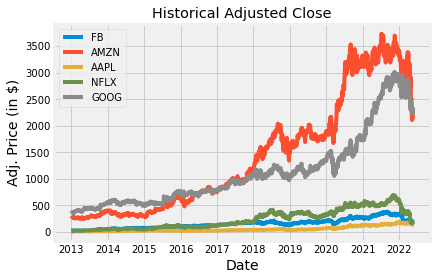

In [7]:
#Visualising the stock performance
for stocks in df.columns.values:
    plt.plot(df[stocks],label=stocks)

plt.title(label='Historical Adjusted Close')
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Adj. Price (in $)', fontsize = 14)
plt.legend(df.columns.values, loc = 'upper left')
plt.show()

In [8]:
daily_returns = df.pct_change()
daily_returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031682,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2022-05-16,0.007149,-0.019853,-0.010672,-0.006022,-0.014788
2022-05-17,0.012897,0.041133,0.025423,0.021715,0.016630
2022-05-18,-0.051229,-0.071562,-0.056419,-0.070162,-0.036850


In [9]:
#Determining the relationship between the movement of the assets on each other
#Creating the annualised covariance matrix
cov_matrix_annual = daily_returns.cov() * 252 #(number of trading days in the year)
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.130396,0.060309,0.048199,0.066508,0.054481
AMZN,0.060309,0.098479,0.043081,0.068409,0.049779
AAPL,0.048199,0.043081,0.081497,0.038785,0.040497
NFLX,0.066508,0.068409,0.038785,0.222017,0.051400
GOOG,0.054481,0.049779,0.040497,0.051400,0.067786


In [10]:
#Calculating the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06572281350241975

In [11]:
#Calculating the portfolio volatality (standard deviation)
port_volatality = np.sqrt(port_variance)
port_volatality

0.25636461047192094

In [12]:
#Annual porfolio returns
portannualreturns= np.sum(daily_returns.mean()*weights*252)
portannualreturns

0.28870916455274104

In [13]:
#Showing the metrics [annual return, volatality (risk) & variance]

percent_var = str( round (port_variance, 5)*100) + '%'
percent_vol = str(round(port_volatality, 3)*100) + '%'
percent_return = str(round(portannualreturns, 3)*100) + '%'

print(f'Expected Annual Return: {percent_return}')
print(f'Annual Volatility/Risk: {percent_vol}')
print(f'Annual Variance: {percent_var}')

Expected Annual Return: 28.9%
Annual Volatility/Risk: 25.6%
Annual Variance: 6.572%


In [14]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [15]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [16]:
#Optimising the portfolio
#Calculating the expected returns & the annualised sample covariance matrix of asset returns
mean = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)

#Optimising the Sharpe Ratio (risk adjusted return)
ef = EfficientFrontier(mean, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('FB', 0.0), ('AMZN', 0.20698), ('AAPL', 0.44892), ('NFLX', 0.16333), ('GOOG', 0.18077)])
Expected annual return: 26.0%
Annual volatility: 24.6%
Sharpe Ratio: 0.97


(0.2595932198150007, 0.24583024125655165, 0.9746287462044108)

In [34]:
#Getting the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.greedy_portfolio()
print(f'Discrete Allocation: {allocation}')
print('Funds Remaining: ${:.2f}'.format(leftover))

Discrete Allocation: {'AAPL': 48, 'AMZN': 1, 'GOOG': 1, 'NFLX': 13}
Funds Remaining: $1635.05
